Credit Risk Assignment



The assignment required 3 techniques of sampling, weighting and the expected cost minimization for these 3 different algorithm (random forest, Linear SVM and gaussian naïve bayes)

The method are applied:

1. w/o any technique the random forest, linear SVM and gaussian naïve bayes algorithms, provide the peformance (plot, confusion matrix and the score from the total cost)
2. sampling method: 
      (i) oversampling (same metrics)
      (ii) undersampling (same metrics)
3. weighting method (same metrics)
4. expected cost minimization (same metrics)

In [68]:
# import the libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from collections import Counter
from sklearn.datasets import  fetch_openml
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

In [88]:
#load the dataset

X, y = fetch_openml("credit-g", version=1, as_frame=True, parser='auto', return_X_y=True)

# check feautre names
Feature_names = X.columns
print(Feature_names)
#print(X.head)

# tranform the data for the algorithms using the OneHotEncoder and scaler

# Select categorical columns for encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Select numerical columns for scaling
numerical_cols = X.select_dtypes(include=['int', 'float']).columns.tolist()

# Encode the categorical columns
encoder = OneHotEncoder()
encoded_array = encoder.fit_transform(X[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_array, columns=[f"{col}_{val}" for col, vals in zip(categorical_cols, encoder.categories_) for val in vals])


# Scale the numerical columns
scaler = StandardScaler()
scaled_array = scaler.fit_transform(X[numerical_cols])
scaled_df = pd.DataFrame(scaled_array, columns=numerical_cols)

# Combine the encoded and scaled DataFrames with the original DataFrame
X = pd.concat([X.drop(categorical_cols + numerical_cols, axis=1), encoded_df, scaled_df], axis=1)

# Print the resulting DataFrame
#print(X.head())


#check the data
#print(X.head())

# check the good and bad cases
print(Counter(y))

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')
Counter({'good': 700, 'bad': 300})


# **The first approach is w/o any technique**



In [89]:
#split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a cost-matrix as in slides
cost_m = [[0, 1], 
          [4, 0]]

#algorithms names 
names = ['random forest', 'linear SVM', 'Gaussian Naïve Bayes']

# we dont tune the model and we used fix values for the hyperparameters
classifiers = [RandomForestClassifier(n_estimators=100, random_state=42), 
               SVC(kernel='linear'), GaussianNB()]

#apply the algorithms random forest, linear SVM and gaussian naïve bayes and their metrics and their cost matrix
# Train and test the classifiers
accuracies = []
cost_sensitivity = []
cost_sensitivity_all = []

for name, clf in zip(names, classifiers):
  print(" ")
  print(name)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=['bad', 'good']))
  conf_m = confusion_matrix(y_test, y_pred).T # transpose to align with slides
  acc = accuracy_score(y_test, y_pred)
  accuracies.append(acc)
  cost = np.sum(conf_m * cost_m)
  cost_sensitivity.append(cost)
  cost_sensitivity_all.append(cost) 
  print(conf_m) 
  print("Total Cost: ", np.sum(conf_m * cost_m))


#gaussian naïve bayes peform better based on the score of the total cost

 
random forest
              precision    recall  f1-score   support

         bad       0.68      0.37      0.48        91
        good       0.77      0.92      0.84       209

    accuracy                           0.76       300
   macro avg       0.73      0.65      0.66       300
weighted avg       0.74      0.76      0.73       300

[[ 34  16]
 [ 57 193]]
Total Cost:  244
 
linear SVM
              precision    recall  f1-score   support

         bad       0.66      0.45      0.54        91
        good       0.79      0.90      0.84       209

    accuracy                           0.76       300
   macro avg       0.73      0.68      0.69       300
weighted avg       0.75      0.76      0.75       300

[[ 41  21]
 [ 50 188]]
Total Cost:  221
 
Gaussian Naïve Bayes
              precision    recall  f1-score   support

         bad       0.51      0.74      0.60        91
        good       0.86      0.69      0.76       209

    accuracy                           0.70       

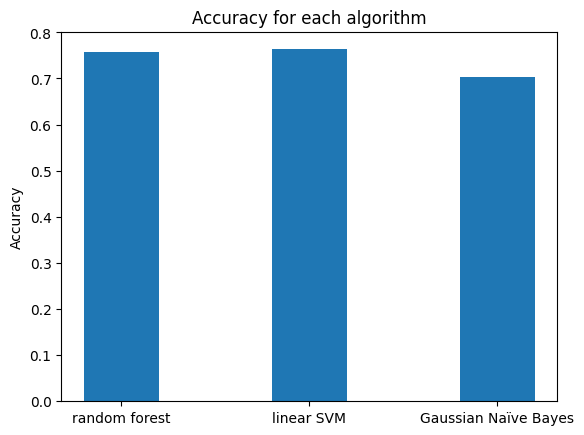

In [90]:
#Accuracy Metric (similar approach for other metrics such as F1, Recall, precision etc)
# Plot the accuracies for each algorithm
fig, ax = plt.subplots()
x = np.arange(len(names))
width = 0.4

rects1 = ax.bar(x, accuracies, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for each algorithm')
ax.set_xticks(x)
ax.set_xticklabels(names)

plt.show()


**The main metric for the algorithms peformance will use the score from the Total Cost** 

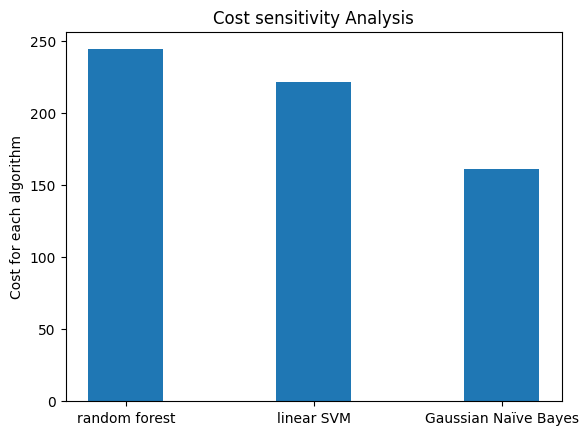

In [91]:
# Plot the Total Cost for each algorithm
fig, ax = plt.subplots()
x = np.arange(len(names))
width = 0.4

rects1 = ax.bar(x, cost_sensitivity, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost for each algorithm')
ax.set_title('Cost sensitivity Analysis')
ax.set_xticks(x)
ax.set_xticklabels(names)

plt.show()

The order from the best to the worst peformance algorith w/o any technique is  as follow: Gaussian NB > Linear SVM > Random Forest. 

# **Sampling method (oversampling and undersampling)**

In [92]:
#The training set include: good cases are 491 and bad cases are 209
print("Counter before oversampling: ", Counter(y_train))


#The first sampling method is to oversample the data with bad cases that support the increasing of the total cost in the case of wrong prediction
#create a new dataset with oversampling
sampler = RandomOverSampler(sampling_strategy={'good':491 , 'bad': 491}, random_state=42) 
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print("Counter after oversampling:",Counter(y_rs))


#apply the algorithms random forest, linear SVM and gaussian naïve bayes and their metrics and their cost matrix
# Train and test the classifiers
accuracies1 = []
cost_sensitivity1 = []

for name, clf in zip(names, classifiers):
  print(" ")
  print(name)
  clf.fit(X_rs, y_rs)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=['bad', 'good']))
  conf_m = confusion_matrix(y_test, y_pred).T # transpose to align with slides
  acc = accuracy_score(y_test, y_pred)
  accuracies1.append(acc)
  cost = np.sum(conf_m * cost_m)
  cost_sensitivity1.append(cost)
  cost_sensitivity_all.append(cost) 
  print(conf_m) 
  print("Total Cost: ", np.sum(conf_m * cost_m))

names_oversampling = [name + '_oversampling' for name in names]
names_end =  names + names_oversampling
#print(names_end)
#gaussian naïve bayes peform better based on the score of the total cost

Counter before oversampling:  Counter({'good': 491, 'bad': 209})
Counter after oversampling: Counter({'good': 491, 'bad': 491})
 
random forest
              precision    recall  f1-score   support

         bad       0.58      0.49      0.54        91
        good       0.79      0.85      0.82       209

    accuracy                           0.74       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.73      0.74      0.73       300

[[ 45  32]
 [ 46 177]]
Total Cost:  216
 
linear SVM
              precision    recall  f1-score   support

         bad       0.52      0.69      0.59        91
        good       0.84      0.72      0.78       209

    accuracy                           0.71       300
   macro avg       0.68      0.71      0.68       300
weighted avg       0.74      0.71      0.72       300

[[ 63  59]
 [ 28 150]]
Total Cost:  171
 
Gaussian Naïve Bayes
              precision    recall  f1-score   support

         bad       0.48      0.

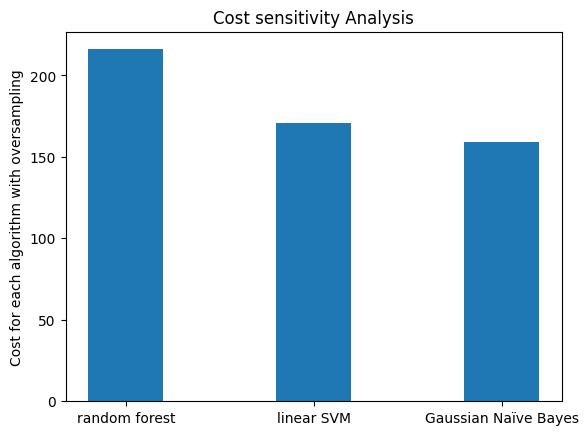

In [93]:
# Plot the Total Cost for each algorithm
fig, ax = plt.subplots()
x = np.arange(len(names))
width = 0.4

rects1 = ax.bar(x, cost_sensitivity1, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost for each algorithm with oversampling')
ax.set_title('Cost sensitivity Analysis')
ax.set_xticks(x)
ax.set_xticklabels(names)

plt.show()

#The Gaussian NB is the best method based on the Total cost peformance

In [94]:

#The second sampling method is to undersample the data with good cases
#create a new dataset with undersampling

#training the data
sampler = RandomUnderSampler(sampling_strategy={'good':209 , 'bad': 209}, random_state=42) 
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print("Counter after undersampling:",Counter(y_rs))


#apply the algorithms random forest, linear SVM and gaussian naïve bayes and their metrics and their cost matrix
# Train and test the classifiers
cost_sensitivity2 = []

for name, clf in zip(names, classifiers):
  print(" ")
  print(name)
  clf.fit(X_rs, y_rs)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=['bad', 'good']))
  conf_m = confusion_matrix(y_test, y_pred).T # transpose to align with slides
  cost = np.sum(conf_m * cost_m)
  cost_sensitivity2.append(cost)
  cost_sensitivity_all.append(cost) 
  print(conf_m) 
  print("Total Cost: ", np.sum(conf_m * cost_m))

names_undersampling = [name + '_undersampling' for name in names]
names_end =  names_end + names_undersampling
#print(names_end)
#gaussian naïve bayes peform better based on the score of the total cost



Counter after undersampling: Counter({'bad': 209, 'good': 209})
 
random forest
              precision    recall  f1-score   support

         bad       0.49      0.75      0.59        91
        good       0.86      0.67      0.75       209

    accuracy                           0.69       300
   macro avg       0.68      0.71      0.67       300
weighted avg       0.75      0.69      0.70       300

[[ 68  70]
 [ 23 139]]
Total Cost:  162
 
linear SVM
              precision    recall  f1-score   support

         bad       0.49      0.70      0.58        91
        good       0.84      0.68      0.75       209

    accuracy                           0.69       300
   macro avg       0.67      0.69      0.67       300
weighted avg       0.74      0.69      0.70       300

[[ 64  66]
 [ 27 143]]
Total Cost:  174
 
Gaussian Naïve Bayes
              precision    recall  f1-score   support

         bad       0.49      0.76      0.60        91
        good       0.86      0.66      0.

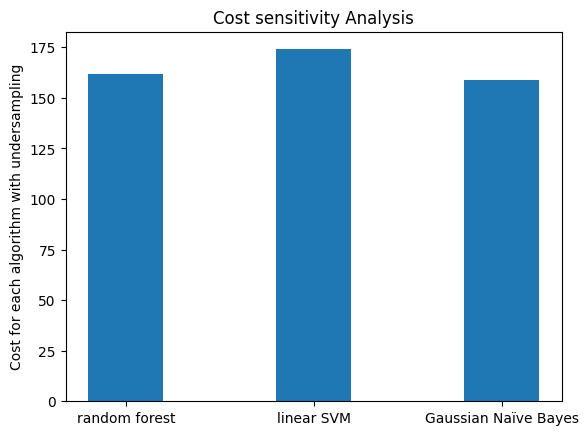

In [95]:
# Plot the Total Cost for each algorithm
fig, ax = plt.subplots()
x = np.arange(len(names))
width = 0.4

rects1 = ax.bar(x, cost_sensitivity2, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost for each algorithm with undersampling')
ax.set_title('Cost sensitivity Analysis')
ax.set_xticks(x)
ax.set_xticklabels(names)

plt.show()

#The Gaussian NB is the best method based on the Total cost peformance, but we observed a different order on the peformance in the other two algorithms. The rf starts to peform better than the SVM.

# **Weighting Method**

In [96]:
#create the weights
weights = np.zeros(y_train.shape[0])
weights[np.where(y_train == 'good')] = 1;
weights[np.where(y_train == 'bad')] = 4;


#apply the algorithms random forest, linear SVM and gaussian naïve bayes and their metrics and their cost matrix
# Train and test the classifiers
cost_sensitivity3 = []

for name, clf in zip(names, classifiers):
  print(" ")
  print(name)
  clf.fit(X_train, y_train, weights)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=['bad', 'good']))
  conf_m = confusion_matrix(y_test, y_pred).T # transpose to align with slides
  cost = np.sum(conf_m * cost_m)
  cost_sensitivity3.append(cost)
  cost_sensitivity_all.append(cost) 
  print(conf_m) 
  print("Total Cost: ", np.sum(conf_m * cost_m))


names_weighted = [name + '_weighted' for name in names]
names_end =  names_end + names_weighted

#The weighted method shows significant changes on the peformance. The linear SVM peform better than the other algorithms. The order for the peformance based on the total cost is SVM > Gaussian NB > RF.

 
random forest
              precision    recall  f1-score   support

         bad       0.72      0.31      0.43        91
        good       0.76      0.95      0.84       209

    accuracy                           0.75       300
   macro avg       0.74      0.63      0.64       300
weighted avg       0.75      0.75      0.72       300

[[ 28  11]
 [ 63 198]]
Total Cost:  263
 
linear SVM
              precision    recall  f1-score   support

         bad       0.49      0.85      0.62        91
        good       0.90      0.62      0.74       209

    accuracy                           0.69       300
   macro avg       0.70      0.73      0.68       300
weighted avg       0.78      0.69      0.70       300

[[ 77  79]
 [ 14 130]]
Total Cost:  135
 
Gaussian Naïve Bayes
              precision    recall  f1-score   support

         bad       0.47      0.79      0.59        91
        good       0.87      0.62      0.72       209

    accuracy                           0.67       

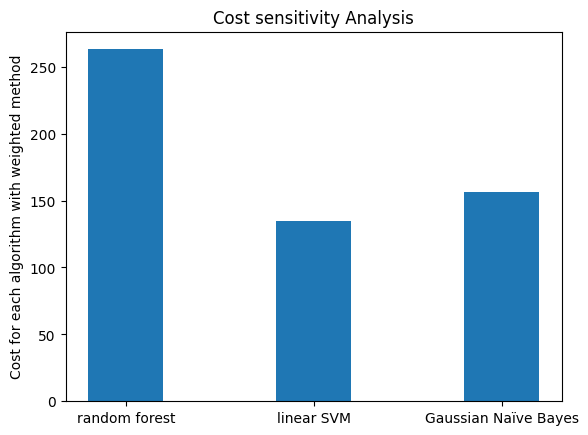

In [97]:
# Plot the Total Cost for each algorithm
fig, ax = plt.subplots()
x = np.arange(len(names))
width = 0.4

rects1 = ax.bar(x, cost_sensitivity3, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost for each algorithm with weighted method')
ax.set_title('Cost sensitivity Analysis')
ax.set_xticks(x)
ax.set_xticklabels(names)

plt.show()

# **Minimizing expected cost**

In [98]:
#first we will minimize it without probability calibration
#we need to have numerical values in our target column to perform the matrix multiplication
#and calculate the probabilities.

label_map = {"good": 0, "bad": 1}

y_train_num = [label_map[c] for c in y_train]
y_test_num = [label_map[c] for c in y_test]

#apply the algorithms random forest, linear SVM and gaussian naïve bayes and their metrics and their cost matrix
# Train and test the classifiers
cost_sensitivity4 = []

classifiers = [RandomForestClassifier(n_estimators=100, random_state=42), 
               SVC(kernel='linear', probability=True), GaussianNB()]

for name, clf in zip(names, classifiers):
  print(" ")
  print(name)
  model = clf.fit(X_train, y_train_num)
  y_pred_prob = model.predict_proba(X_test)
  y_pred = np.argmin(np.matmul(y_pred_prob, np.array(cost_m).T), axis=1) 
  print(classification_report(y_test_num, y_pred, target_names=['bad', 'good']))
  conf_m = confusion_matrix(y_test_num, y_pred).T
  cost = np.sum(conf_m * cost_m)
  cost_sensitivity4.append(cost)
  cost_sensitivity_all.append(cost) 
  print(conf_m) 
  print("Total Cost: ", np.sum(conf_m * cost_m))


names_minexpcost = [name + '_minexpcost' for name in names]
names_end =  names_end + names_minexpcost

#The SVM is slight better than the rf and for fist time the Guassian is the worst algorithm. In this method the Gaussian increase significant the total cost. 


 
random forest
              precision    recall  f1-score   support

         bad       0.71      1.00      0.83       209
        good       0.80      0.04      0.08        91

    accuracy                           0.71       300
   macro avg       0.75      0.52      0.45       300
weighted avg       0.73      0.71      0.60       300

[[208  87]
 [  1   4]]
Total Cost:  91
 
linear SVM
              precision    recall  f1-score   support

         bad       0.70      1.00      0.82       209
        good       1.00      0.01      0.02        91

    accuracy                           0.70       300
   macro avg       0.85      0.51      0.42       300
weighted avg       0.79      0.70      0.58       300

[[209  90]
 [  0   1]]
Total Cost:  90
 
Gaussian Naïve Bayes
              precision    recall  f1-score   support

         bad       0.85      0.78      0.81       209
        good       0.57      0.68      0.62        91

    accuracy                           0.75       30

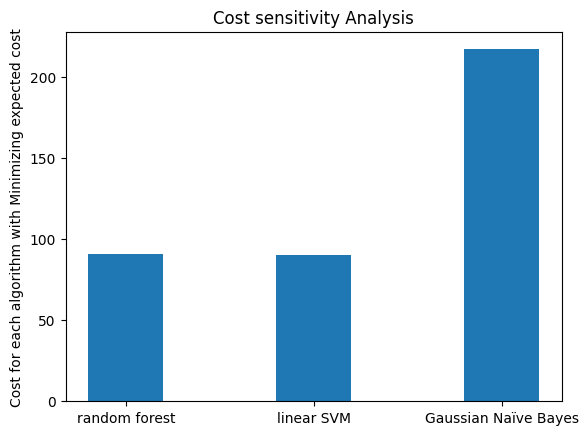

In [99]:
# Plot the Total Cost for each algorithm
fig, ax = plt.subplots()
x = np.arange(len(names))
width = 0.4

rects1 = ax.bar(x, cost_sensitivity4, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost for each algorithm with Minimizing expected cost')
ax.set_title('Cost sensitivity Analysis')
ax.set_xticks(x)
ax.set_xticklabels(names)

plt.show()

# **Plots the peformance for every algo and method**

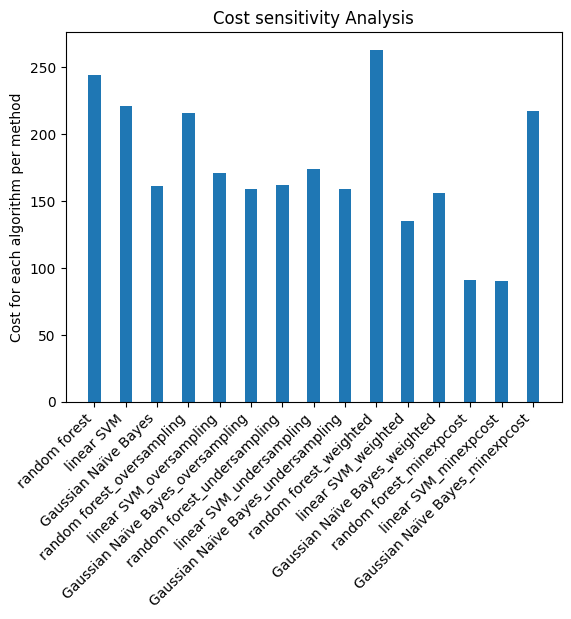

In [100]:
# Plot the Total Cost for each algorithm for each method
fig, ax = plt.subplots()
x = np.arange(len(names_end))
width = 0.4

rects1 = ax.bar(x, cost_sensitivity_all, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost for each algorithm per method')
ax.set_title('Cost sensitivity Analysis')
ax.set_xticks(x)
ax.set_xticklabels(names_end, rotation=45, ha='right')

plt.show()

The empirical results indicate that the algorithm's performance varies depending on the method used. For oversampling and undersampling methods, the recommended algorithm is Gaussian, while for weighted and minimize exponential cost methods, the recommended algorithm is Linear SVM. 